<a href="https://colab.research.google.com/github/Ricardo-Gomes-Junior/-DS---AVALIA-O-N2/blob/main/S%C3%A9rie_Temporal_por_M%C3%AAs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from itertools import product

In [ ]:
# Carregando os dados
df = pd.read_csv('/content/df_nordeste.csv')

# Convertendo 'data_inversa' para tipo datetime
df['data_inversa'] = pd.to_datetime(df['data_inversa'], format='%Y-%m-%d', errors='coerce')

# Extraindo o mês e o ano
df['ano'] = df['data_inversa'].dt.year
df['mes'] = df['data_inversa'].dt.month

# Contagem de acidentes por mês e ano
acidentes_por_mes_ano = df.groupby(['ano', 'mes']).size().reset_index(name='contagem')

# Criando uma coluna de data para a série temporal sem o dia
acidentes_por_mes_ano['data'] = pd.to_datetime(pd.PeriodIndex(year=acidentes_por_mes_ano['ano'],
                                                               month=acidentes_por_mes_ano['mes'],
                                                               freq='M').to_timestamp())

# Ordenando os dados pela data
acidentes_por_mes_ano = acidentes_por_mes_ano.sort_values(by='data')

# Dividindo os dados em conjuntos de treino e teste (70% treino, 30% teste)
train_size = int(len(acidentes_por_mes_ano) * 0.7)
train, test = acidentes_por_mes_ano.iloc[:train_size], acidentes_por_mes_ano.iloc[train_size:]


<ipython-input-2-1ffd6d7e0a4c>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/df_nordeste.csv')


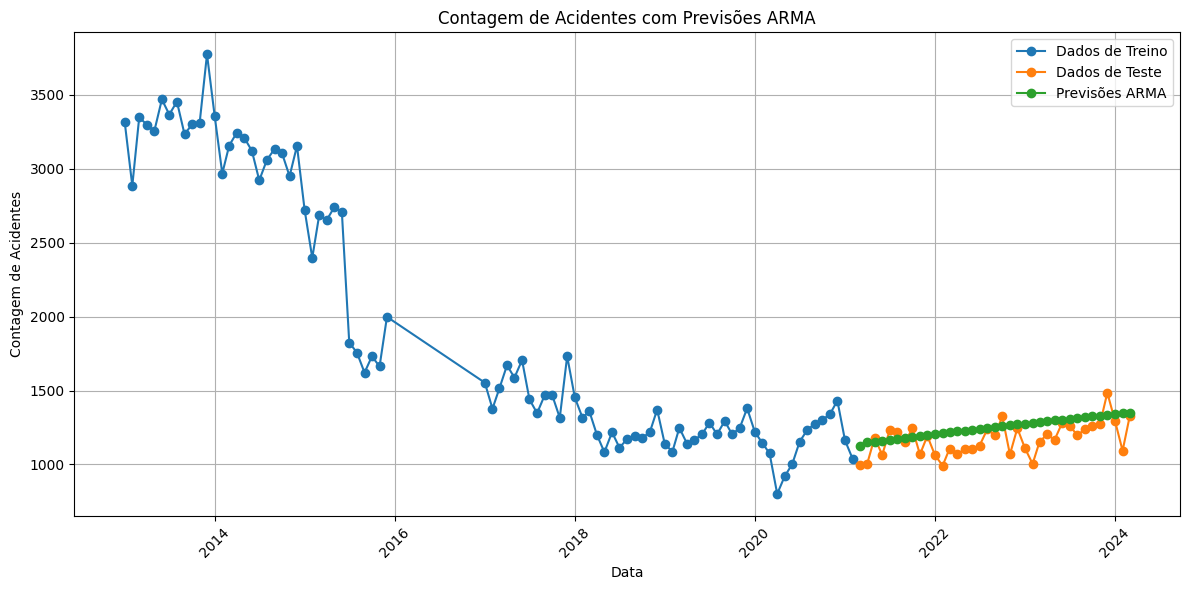

In [ ]:
# Ajustando o modelo ARMA com a base de treino
modelo_arma = ARIMA(train['contagem'], order=(2, 0, 2))
resultado_arma = modelo_arma.fit()

# Fazer previsões usando a base de teste
previsoes_arma = resultado_arma.forecast(steps=len(test))

# Plotando previsões ARMA
plt.figure(figsize=(12, 6))
plt.plot(train['data'], train['contagem'], label='Dados de Treino', marker='o')
plt.plot(test['data'], test['contagem'], label='Dados de Teste', marker='o')
plt.plot(test['data'], previsoes_arma, label='Previsões ARMA', marker='o')
plt.title('Contagem de Acidentes com Previsões ARMA')
plt.xlabel('Data')
plt.ylabel('Contagem de Acidentes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


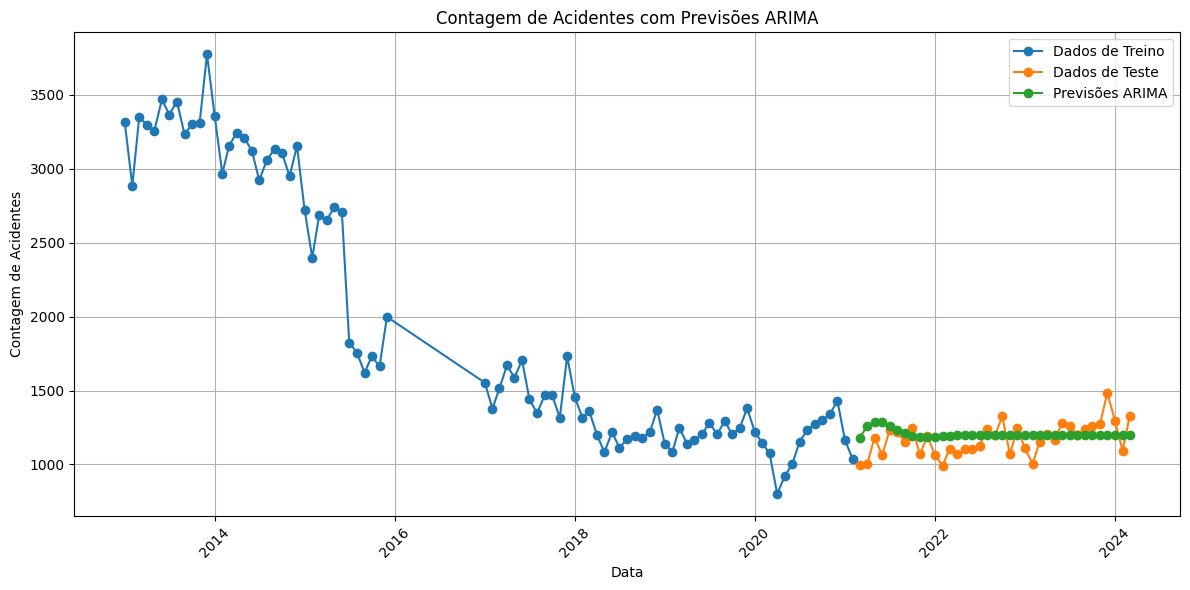

In [ ]:
# Ajustando o modelo ARIMA com a base de treino
modelo_arima = ARIMA(train['contagem'], order=(2, 1, 2))
resultado_arima = modelo_arima.fit()

# Fazer previsões usando a base de teste
previsoes_arima = resultado_arima.forecast(steps=len(test))

# Plotando previsões ARIMA
plt.figure(figsize=(12, 6))
plt.plot(train['data'], train['contagem'], label='Dados de Treino', marker='o')
plt.plot(test['data'], test['contagem'], label='Dados de Teste', marker='o')
plt.plot(test['data'], previsoes_arima, label='Previsões ARIMA', marker='o')
plt.title('Contagem de Acidentes com Previsões ARIMA')
plt.xlabel('Data')
plt.ylabel('Contagem de Acidentes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


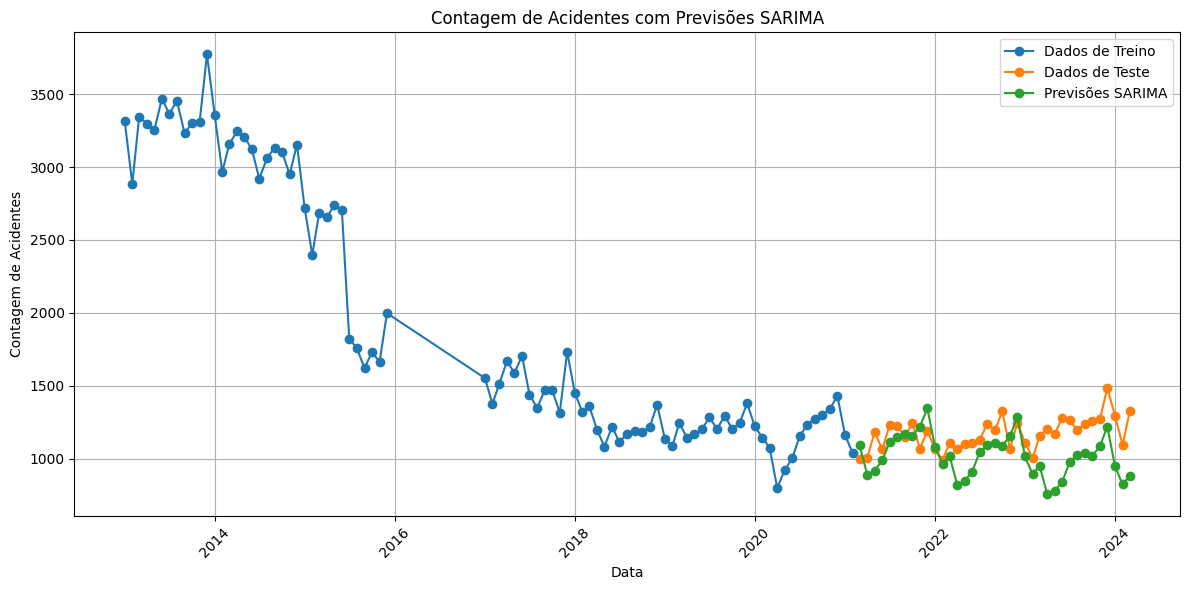

In [ ]:
# Ajustando o modelo SARIMA com a base de treino
modelo_sarima = SARIMAX(train['contagem'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
resultado_sarima = modelo_sarima.fit()

# Fazer previsões usando a base de teste
previsoes_sarima = resultado_sarima.forecast(steps=len(test))

# Plotando previsões SARIMA
plt.figure(figsize=(12, 6))
plt.plot(train['data'], train['contagem'], label='Dados de Treino', marker='o')
plt.plot(test['data'], test['contagem'], label='Dados de Teste', marker='o')
plt.plot(test['data'], previsoes_sarima, label='Previsões SARIMA', marker='o')
plt.title('Contagem de Acidentes com Previsões SARIMA')
plt.xlabel('Data')
plt.ylabel('Contagem de Acidentes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Funções de Grid Search

In [ ]:
# Função de Grid Search para ARMA
def grid_search_arma(data, p_values, q_values):
    best_aic = float("inf")
    best_order = None
    best_model = None

    for p, q in product(p_values, q_values):
        try:
            model = ARIMA(data, order=(p, 0, q)).fit()
            aic = model.aic
            if aic < best_aic:
                best_aic = aic
                best_order = (p, 0, q)
                best_model = model
        except Exception as e:
            continue
    return best_order, best_model


In [ ]:
# Função de Grid Search para ARIMA
def grid_search_arima(data, p_values, d_values, q_values):
    best_aic = float("inf")
    best_order = None
    best_model = None

    for p, d, q in product(p_values, d_values, q_values):
        try:
            model = ARIMA(data, order=(p, d, q)).fit()
            aic = model.aic
            if aic < best_aic:
                best_aic = aic
                best_order = (p, d, q)
                best_model = model
        except Exception as e:
            continue
    return best_order, best_model


In [ ]:
# Função de Grid Search para SARIMA
def grid_search_sarima(data, p_values, d_values, q_values, P_values, D_values, Q_values, m):
    best_aic = float("inf")
    best_order = None
    best_seasonal_order = None
    best_model = None

    for p, d, q, P, D, Q in product(p_values, d_values, q_values, P_values, D_values, Q_values):
        try:
            model = SARIMAX(data, order=(p, d, q), seasonal_order=(P, D, Q, m)).fit(disp=False)
            aic = model.aic
            if aic < best_aic:
                best_aic = aic
                best_order = (p, d, q)
                best_seasonal_order = (P, D, Q, m)
                best_model = model
        except Exception as e:
            continue
    return best_order, best_seasonal_order, best_model


# Executar Grid Search e Ajustar Modelos

In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Definir os valores dos parâmetros para grid search
p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
m = 12

# Executar o grid search para ARMA
best_order_arma, best_model_arma = grid_search_arma(train['contagem'], p_values, q_values)
print(f"Melhor ordem ARMA encontrada: {best_order_arma}")

# Executar o grid search para ARIMA
best_order_arima, best_model_arima = grid_search_arima(train['contagem'], p_values, d_values, q_values)
print(f"Melhor ordem ARIMA encontrada: {best_order_arima}")

# Executar o grid search para SARIMA
best_order_sarima, best_seasonal_order_sarima, best_model_sarima = grid_search_sarima(train['contagem'], p_values, d_values, q_values, P_values, D_values, Q_values, m)
print(f"Melhor ordem SARIMA encontrada: {best_order_sarima} com ordem sazonal {best_seasonal_order_sarima}")


Melhor ordem ARMA encontrada: (3, 0, 3)
Melhor ordem ARIMA encontrada: (2, 1, 3)
Melhor ordem SARIMA encontrada: (0, 1, 0) com ordem sazonal (0, 1, 1, 12)


# Fazer Previsões e Calcular Métricas de Erro

In [ ]:
# Previsões e Métricas para ARMA
predictions_arma = best_model_arma.get_forecast(steps=len(test))
predicted_arma_mean = predictions_arma.predicted_mean
conf_int_arma = predictions_arma.conf_int(alpha=0.05)
mse_arma = mean_squared_error(test['contagem'], predicted_arma_mean)
mae_arma = mean_absolute_error(test['contagem'], predicted_arma_mean)
print(f"ARMA - Mean Squared Error: {mse_arma}, Mean Absolute Error: {mae_arma}")


ARMA - Mean Squared Error: 13611.719762781857, Mean Absolute Error: 96.77585315792128


In [ ]:
# Previsões e Métricas para ARIMA
predictions_arima = best_model_arima.get_forecast(steps=len(test))
predicted_arima_mean = predictions_arima.predicted_mean
conf_int_arima = predictions_arima.conf_int(alpha=0.05)
mse_arima = mean_squared_error(test['contagem'], predicted_arima_mean)
mae_arima = mean_absolute_error(test['contagem'], predicted_arima_mean)
print(f"ARIMA - Mean Squared Error: {mse_arima}, Mean Absolute Error: {mae_arima}")


ARIMA - Mean Squared Error: 23480.086014594293, Mean Absolute Error: 122.01407791292456


In [ ]:
# Previsões e Métricas para SARIMA
predictions_sarima = best_model_sarima.get_forecast(steps=len(test))
predicted_sarima_mean = predictions_sarima.predicted_mean
conf_int_sarima = predictions_sarima.conf_int(alpha=0.05)
mse_sarima = mean_squared_error(test['contagem'], predicted_sarima_mean)
mae_sarima = mean_absolute_error(test['contagem'], predicted_sarima_mean)
print(f"SARIMA - Mean Squared Error: {mse_sarima}, Mean Absolute Error: {mae_sarima}")


SARIMA - Mean Squared Error: 71989.57744341278, Mean Absolute Error: 224.0296487135838


# Previsões com Margem de Erro

(array([15340., 16071., 16801., 17532., 18262., 18993., 19723.]),
 [Text(15340.0, 0, '2012'),
  Text(16071.0, 0, '2014'),
  Text(16801.0, 0, '2016'),
  Text(17532.0, 0, '2018'),
  Text(18262.0, 0, '2020'),
  Text(18993.0, 0, '2022'),
  Text(19723.0, 0, '2024')])

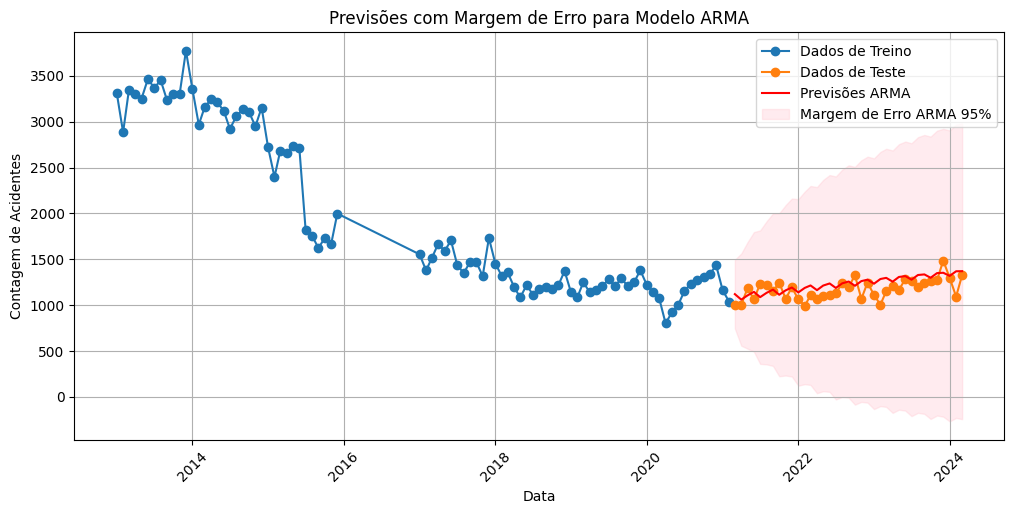

In [ ]:
import matplotlib.pyplot as plt

# Tamanho da figura
plt.figure(figsize=(12, 18))

# Plot para ARMA
plt.subplot(3, 1, 1)
plt.plot(train['data'], train['contagem'], label='Dados de Treino', marker='o')
plt.plot(test['data'], test['contagem'], label='Dados de Teste', marker='o')
plt.plot(test['data'], predicted_arma_mean, label='Previsões ARMA', color='red')
plt.fill_between(test['data'], conf_int_arma.iloc[:, 0], conf_int_arma.iloc[:, 1], color='pink', alpha=0.3, label='Margem de Erro ARMA 95%')
plt.title('Previsões com Margem de Erro para Modelo ARMA')
plt.xlabel('Data')
plt.ylabel('Contagem de Acidentes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

(array([15340., 16071., 16801., 17532., 18262., 18993., 19723.]),
 [Text(15340.0, 0, '2012'),
  Text(16071.0, 0, '2014'),
  Text(16801.0, 0, '2016'),
  Text(17532.0, 0, '2018'),
  Text(18262.0, 0, '2020'),
  Text(18993.0, 0, '2022'),
  Text(19723.0, 0, '2024')])

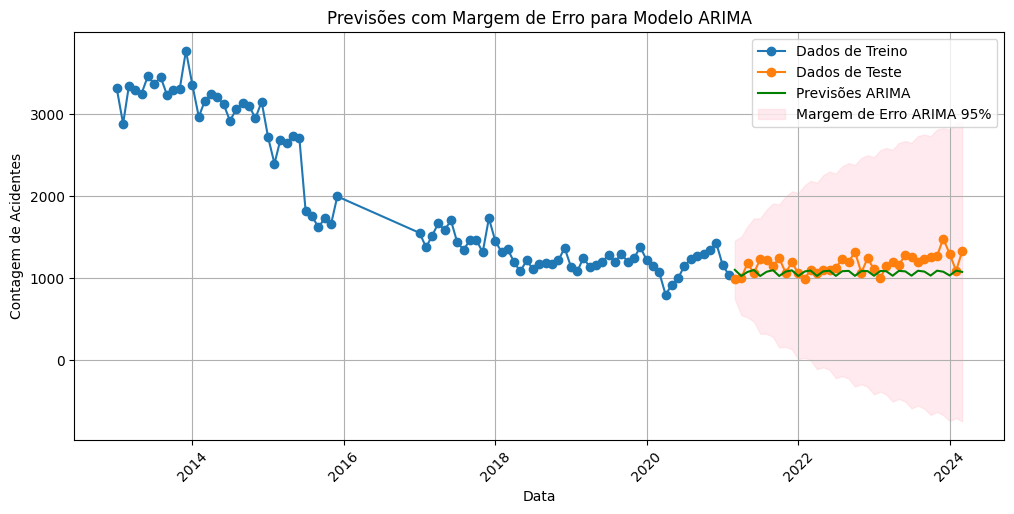

In [ ]:
# Plot para ARIMA

# Tamanho da figura
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 2)
plt.plot(train['data'], train['contagem'], label='Dados de Treino', marker='o')
plt.plot(test['data'], test['contagem'], label='Dados de Teste', marker='o')
plt.plot(test['data'], predicted_arima_mean, label='Previsões ARIMA', color='green')
plt.fill_between(test['data'], conf_int_arima.iloc[:, 0], conf_int_arima.iloc[:, 1], color='pink', alpha=0.3, label='Margem de Erro ARIMA 95%')
plt.title('Previsões com Margem de Erro para Modelo ARIMA')
plt.xlabel('Data')
plt.ylabel('Contagem de Acidentes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

(array([15340., 16071., 16801., 17532., 18262., 18993., 19723.]),
 [Text(15340.0, 0, '2012'),
  Text(16071.0, 0, '2014'),
  Text(16801.0, 0, '2016'),
  Text(17532.0, 0, '2018'),
  Text(18262.0, 0, '2020'),
  Text(18993.0, 0, '2022'),
  Text(19723.0, 0, '2024')])

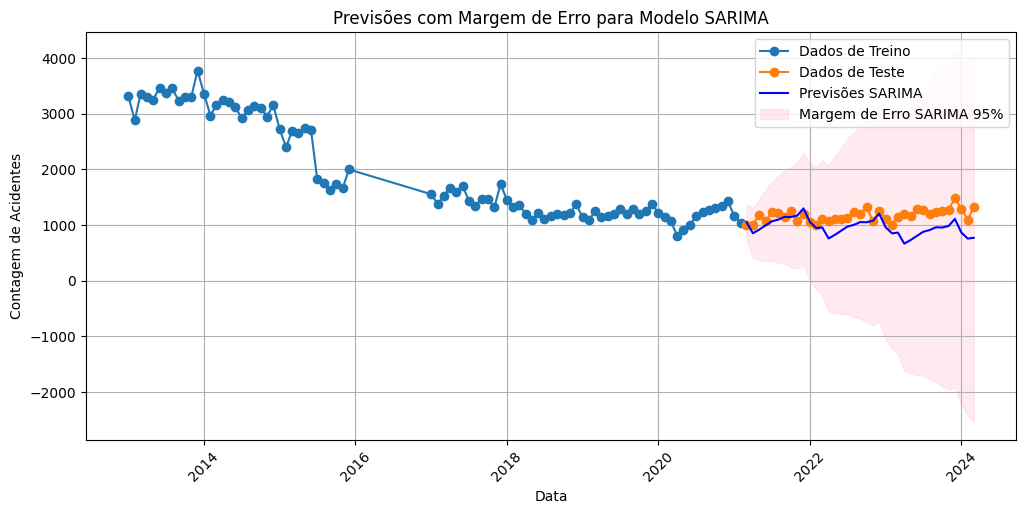

In [ ]:
# Plot para SARIMA

# Tamanho da figura
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 3)
plt.plot(train['data'], train['contagem'], label='Dados de Treino', marker='o')
plt.plot(test['data'], test['contagem'], label='Dados de Teste', marker='o')
plt.plot(test['data'], predicted_sarima_mean, label='Previsões SARIMA', color='blue')
plt.fill_between(test['data'], conf_int_sarima.iloc[:, 0], conf_int_sarima.iloc[:, 1], color='pink', alpha=0.3, label='Margem de Erro SARIMA 95%')
plt.title('Previsões com Margem de Erro para Modelo SARIMA')
plt.xlabel('Data')
plt.ylabel('Contagem de Acidentes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

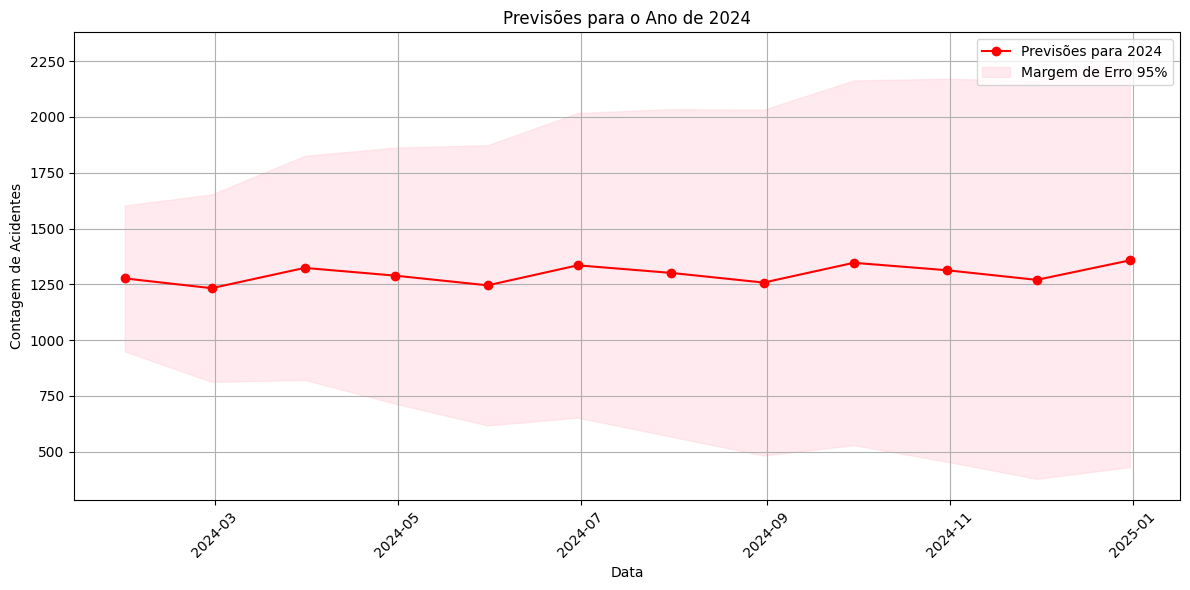

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Ajustar o modelo ARMA com todos os dados disponíveis
best_model_arma_full = ARIMA(acidentes_por_mes_ano['contagem'], order=best_order_arma).fit()

# Fazer previsões para os 12 meses de 2024
steps = 12  # número de meses em 2024
start = len(acidentes_por_mes_ano)
end = start + steps - 1

# Gerar previsões
forecast_2024 = best_model_arma_full.get_forecast(steps=steps)
predicted_2024_mean = forecast_2024.predicted_mean
conf_int_2024 = forecast_2024.conf_int(alpha=0.05)

# Criar um DataFrame com as previsões e os intervalos de confiança
dates_2024 = pd.date_range(start='2024-01-01', periods=steps, freq='M')
forecast_2024_df = pd.DataFrame({
    'data': dates_2024,
    'previsao': predicted_2024_mean,
    'lower_conf_int': conf_int_2024.iloc[:, 0],
    'upper_conf_int': conf_int_2024.iloc[:, 1]
})

# Plotar as previsões para 2024
plt.figure(figsize=(12, 6))

# Previsões para 2024
plt.plot(forecast_2024_df['data'], forecast_2024_df['previsao'], label='Previsões para 2024', color='red', marker='o')
plt.fill_between(forecast_2024_df['data'], forecast_2024_df['lower_conf_int'], forecast_2024_df['upper_conf_int'], color='pink', alpha=0.3, label='Margem de Erro 95%')

# Personalizando o gráfico
plt.title('Previsões para o Ano de 2024')
plt.xlabel('Data')
plt.ylabel('Contagem de Acidentes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Gráficos gerados para o Artigo

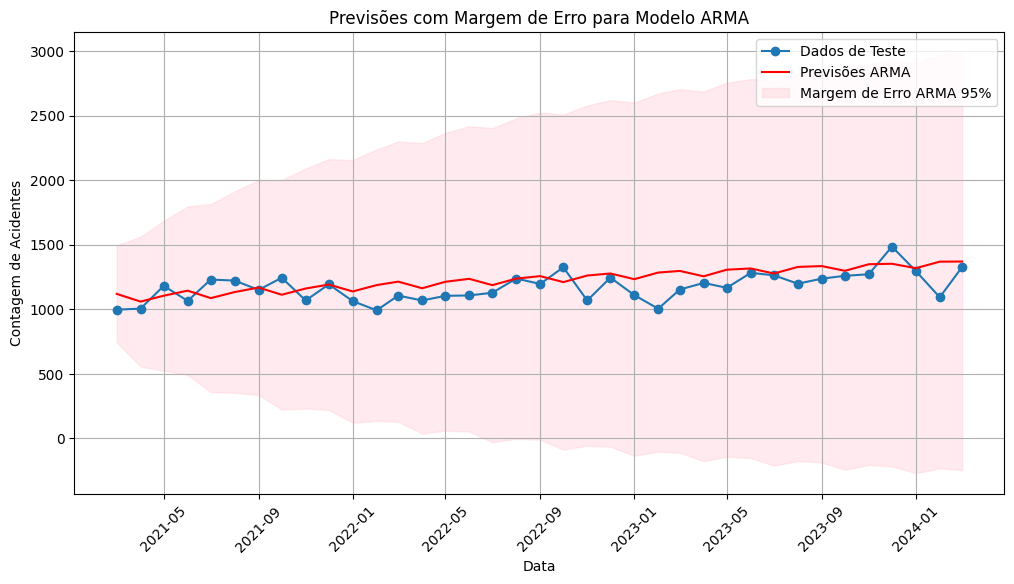

In [ ]:
# Plot para ARMA
plt.figure(figsize=(12, 6))
plt.plot(test['data'], test['contagem'], label='Dados de Teste', marker='o')
plt.plot(test['data'], predicted_arma_mean, label='Previsões ARMA', color='red')
plt.fill_between(test['data'], conf_int_arma.iloc[:, 0], conf_int_arma.iloc[:, 1], color='pink', alpha=0.3, label='Margem de Erro ARMA 95%')
plt.title('Previsões com Margem de Erro para Modelo ARMA')
plt.xlabel('Data')
plt.ylabel('Contagem de Acidentes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

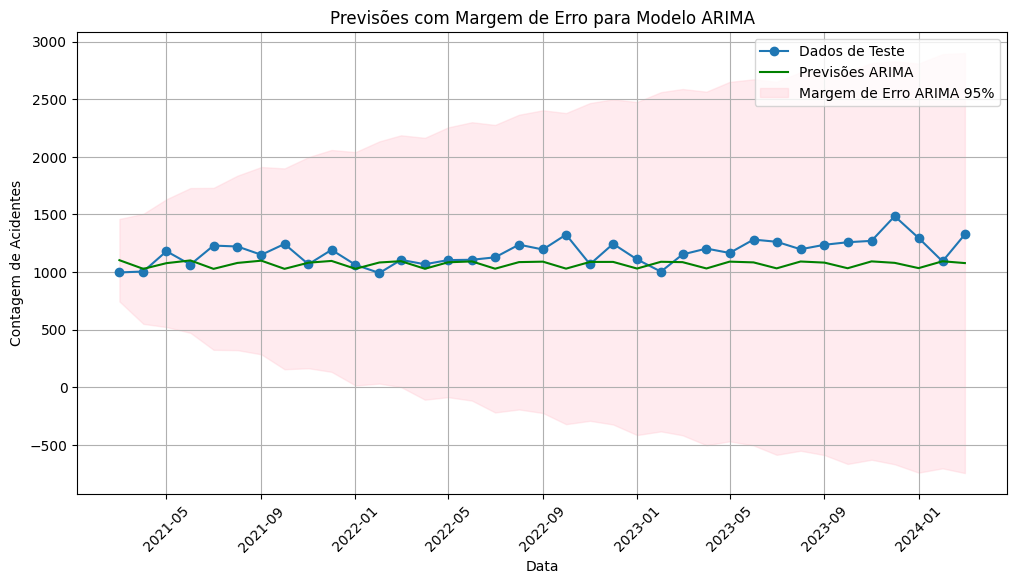

In [ ]:
# Plot para ARIMA
plt.figure(figsize=(12, 6))
plt.plot(test['data'], test['contagem'], label='Dados de Teste', marker='o')
plt.plot(test['data'], predicted_arima_mean, label='Previsões ARIMA', color='green')
plt.fill_between(test['data'], conf_int_arima.iloc[:, 0], conf_int_arima.iloc[:, 1], color='pink', alpha=0.3, label='Margem de Erro ARIMA 95%')
plt.title('Previsões com Margem de Erro para Modelo ARIMA')
plt.xlabel('Data')
plt.ylabel('Contagem de Acidentes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

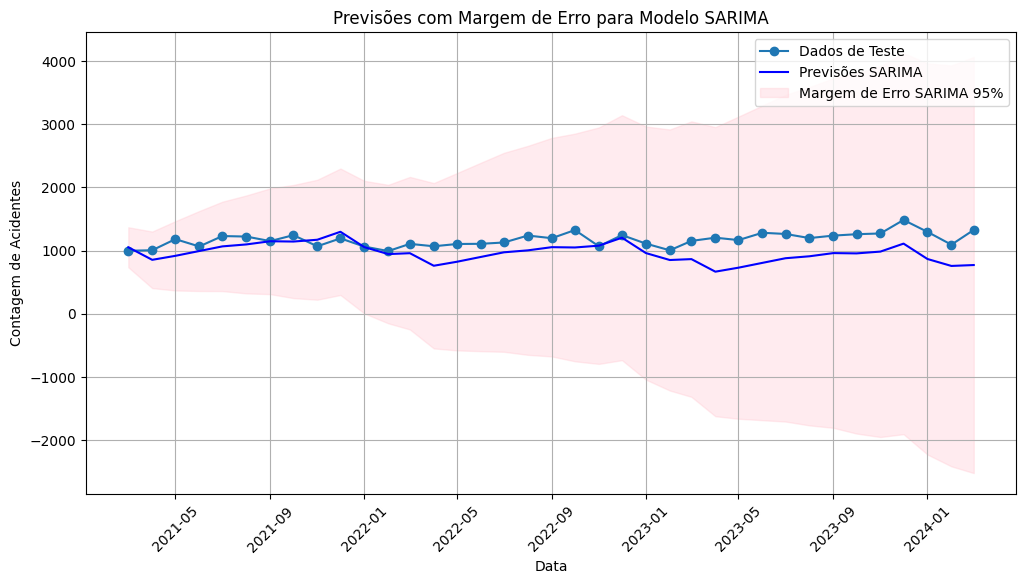

In [ ]:
# Plot para SARIMA
plt.figure(figsize=(12, 6))
plt.plot(test['data'], test['contagem'], label='Dados de Teste', marker='o')
plt.plot(test['data'], predicted_sarima_mean, label='Previsões SARIMA', color='blue')
plt.fill_between(test['data'], conf_int_sarima.iloc[:, 0], conf_int_sarima.iloc[:, 1], color='pink', alpha=0.3, label='Margem de Erro SARIMA 95%')
plt.title('Previsões com Margem de Erro para Modelo SARIMA')
plt.xlabel('Data')
plt.ylabel('Contagem de Acidentes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()